In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Clustering\\crime_data.csv")

In [4]:
df.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [24]:
df_1=df.iloc[:,1:5]  ## dropped the unnamed column

In [25]:
df_1.info()          ##Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [26]:
df_1.shape

(50, 4)

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as numpy
import matplotlib.pyplot as plt 
import pandas as pd

In [28]:
array=df_1.values

In [39]:
stscaler=StandardScaler().fit(array)    ## normalize
#stscaler
x=stscaler.transform(array)             
#x

In [56]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=5)

nbrs=neigh.fit(x)
distances,indices=nbrs.kneighbors(x)
#distances,indices

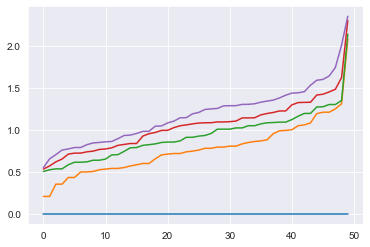

In [73]:
import numpy as np
import seaborn as sns
sns.set_style(style='darkgrid')
distances=np.sort(distances,axis=0)
#distances=distances[:,1:6]
plt.plot(distances)
#distances.shape
plt.show()

In [81]:
dbscan=DBSCAN(eps=1.25,min_samples=5)
dbscan
dbscan.fit(x)
dbscan.labels_

array([ 0, -1,  1,  2, -1,  1,  2,  2, -1,  0,  2,  2,  1,  2,  2,  2,  2,
        0,  2,  1,  2,  1,  2, -1,  2,  2,  2, -1,  2,  2,  1,  1, -1,  2,
        2,  2,  2,  2,  2,  0,  2,  0,  2,  2,  2,  2,  2,  2,  2,  2],
      dtype=int64)

In [82]:
cl=pd.DataFrame(dbscan.labels_,columns=['clusters'])


In [83]:
data2=pd.concat([df,cl],axis=1)
#data2

In [84]:
data2.groupby(['clusters']).count()   ## to find % of outliers

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
clusters,,,,,
-1,6,6,6,6,6
0,5,5,5,5,5
1,7,7,7,7,7
2,32,32,32,32,32


In [85]:
(6/50)*100    # 12% observations are noisy points in the dataset

12.0

In [88]:
plt.scatterplot(df_1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'scatterplot'